In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

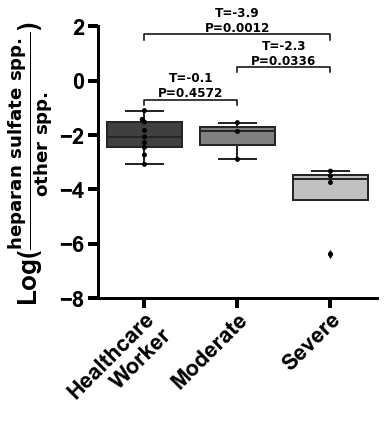

In [2]:
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.major.pad'] = '.1'

pal_ = {'Control':'#377eb8','COVID-19':'#e41a1c'}
label_ = 'Log($\\frac{\mathrm{heparan\,\,sulfate\,\,spp.}}{\mathrm{other\,\,spp.}}$)'

fig, ax = plt.subplots(1,1, figsize=(5,5))

y_ = 'log_ratio'
order_map = {'Healthcare\nWorker':0, 'Moderate':1, 'Severe':2}
order_ = ['Healthcare\nWorker', 'Moderate', 'Severe']


# timepoint_rounded_singlestay
time_ = 'timepoint_allstays'
lrdf_plot = pd.read_csv('../data/hospital-validation-study/final-log-ratio-and-metadata.csv',
                        index_col=0)

t_res = {}
lrs_ds = {ds_:dsdf_.log_ratio.values for ds_, dsdf_ in lrdf_plot.groupby('disease_severity')}
comobos = [('Moderate', 'Healthcare\nWorker'), ('Severe', 'Moderate'), ('Severe','Healthcare\nWorker')]
for c1, c2 in comobos:
    t_stat, p_ = ttest_ind(lrs_ds[c1], lrs_ds[c2],
                           alternative='less')
    t_res[(c1, c2)] =  t_stat, p_
t_resdf = pd.DataFrame(t_res).T
order_map_stats = {(order_map[k[0]], order_map[k[1]]):v for k, v in t_res.items()}

sns.swarmplot(y=y_, x='disease_severity', 
              data=lrdf_plot, 
              color='black',
              order=order_,
              s=5,
              ax=ax)
sns.boxplot(y=y_, x='disease_severity', 
              data=lrdf_plot,
              palette='gray',
              order=order_,
             ax=ax, linewidth=2)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .0))


ax.set_facecolor('white')
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)
for sp_i in ax.spines.values():
    sp_i.set_linewidth(3)
for child in ax.get_children():
    if isinstance(child, matplotlib.spines.Spine):
        child.set_color('black')
ax.tick_params(axis='y', colors='black', width=4, length=10)
ax.tick_params(axis='x', colors='black', width=4, length=10)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right',
                   rotation_mode="anchor")
for tick in ax.get_xticklabels():
    tick.set_fontproperties('arial')
    tick.set_ha("right")
    tick.set_weight("bold")
    tick.set_color("black")
    tick.set_fontsize(22)
for tick in ax.get_yticklabels():
    tick.set_fontproperties('arial')
    tick.set_weight("bold")
    tick.set_color("black")
    tick.set_fontsize(22)
ax.set_ylim(-8, 2)

ax.set_ylabel(label_,
              fontsize=26,
              family = 'arial',
              weight='bold',
              color='black')
ax.set_xlabel('',
              fontsize=26,
              family = 'arial',
              weight='bold',
              color='black')


for i_v, ((x1, x2), (stat_, p_)) in enumerate(order_map_stats.items()):
    y, h, col = (i_v * 1.2) - 0.9, .2, 'k'
    ax.plot([x1, x1, x2, x2],
             [y, y+h, y+h, y],
             lw=1.5, c=col)
    if 'e' in str(p_):
        p_ = str(p_)
        p_ = p_[:3] + p_[p_.index('e'):]
        p_ = "T=%.1f\nP=%s" % (stat_, p_)
    else:
        p_ = "T=%.1f\nP=%.4f" % (stat_, p_)
    ax.text((x1+x2)*.5, y+h,
             p_, ha='center',fontsize=12,
             va='bottom', color=col)

plt.savefig('../results/figures/Fig2D.pdf' ,
            dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()
